In [115]:
import pandas as pd

data = pd.read_csv('../data/U4_01_housing.csv')

In [116]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [117]:
data['ocean_proximity'].value_counts()


ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [119]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [145]:
data_filtered = data.copy(deep=True)

In [152]:
data_filtered.loc[data_filtered["housing_median_age"] > 50, "housing_median_age"] = 50
data_filtered_count = (data_filtered.housing_median_age == 50).sum()
data_filtered_count

0

In [153]:
data_count_equals = (data.median_house_value == 500000).sum()
data_count_grather = (data.median_house_value > 500000).sum()
print(f"Equals: {data_count_equals}, Grather: {data_count_grather}")

Equals: 27, Grather: 965


In [154]:
data_filtered.loc[data_filtered.median_house_value > 500000, "median_house_value"] = 500000
data_filtered_count = (data_filtered.median_house_value == 500000).sum()
data_filtered_count
# data['ocean_proximity'].value_counts()
# data_filtered.head()

0

In [155]:
data_count_equals = (data.median_income == 15).sum()
data_count_grather = (data.median_income > 15).sum()
print(f"Equals: {data_count_equals}, Grather: {data_count_grather}")
# data["median_income"].value_counts()

Equals: 2, Grather: 49


In [156]:
data_filtered.loc[data_filtered.median_income > 15, "median_income"] = 15
data_filtered_count = (data_filtered.median_income == 15).sum()
data_filtered_count

0

In [151]:
data_filtered = data_filtered.drop(data_filtered[data_filtered["housing_median_age"] >= 50].index)
data_filtered = data_filtered.drop(data_filtered[data_filtered["median_house_value"] >= 500000].index)
data_filtered = data_filtered.drop(data_filtered[data_filtered["median_income"] >= 15].index)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

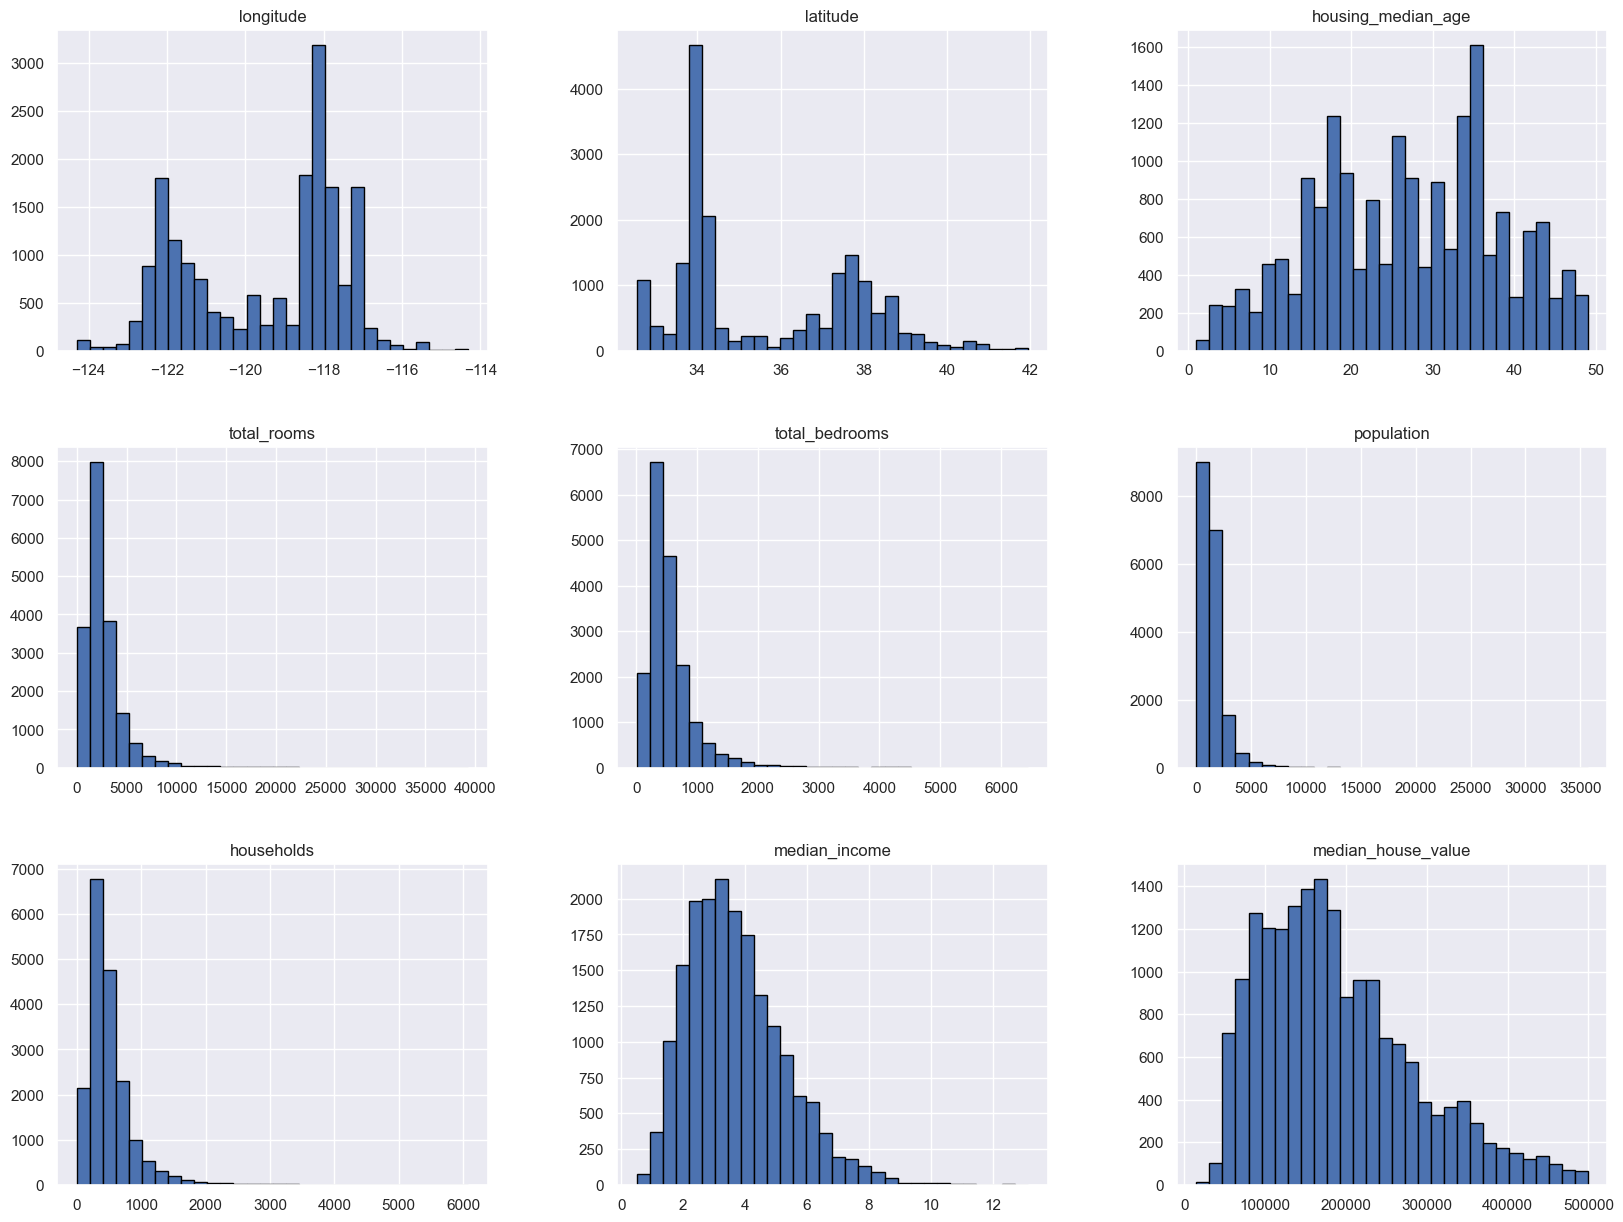

In [157]:
data_filtered.hist(figsize=(20,15), bins=30, edgecolor="black")

TypeError: cannot convert the series to <class 'float'>

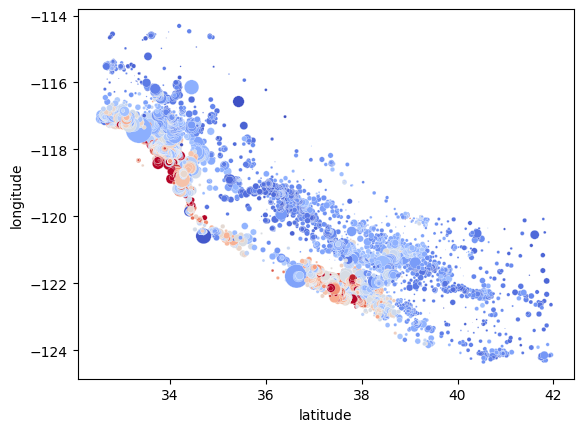

In [83]:
import seaborn as sb
# s parameter is for size of the dots and indicates where lives the most people
sb.scatterplot(x='latitude', y='longitude', data=data_filtered, hue='median_house_value', palette='coolwarm', s=data_filtered['population']/100)
# represents California map

<Axes: xlabel='longitude', ylabel='latitude'>

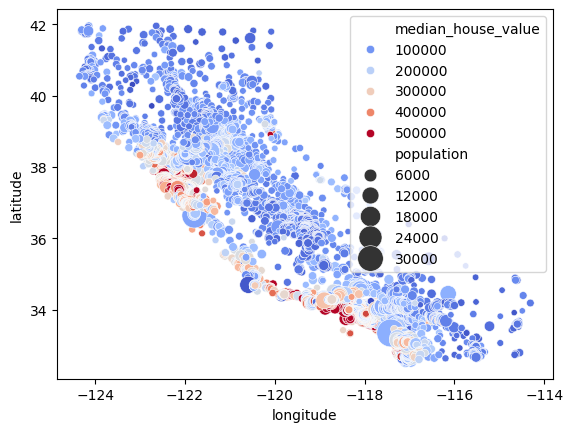

In [86]:
sb.scatterplot(x='longitude', y='latitude', data=data_filtered, hue='median_house_value', size='population', sizes=(20,400), palette='coolwarm')

<Axes: xlabel='latitude', ylabel='longitude'>

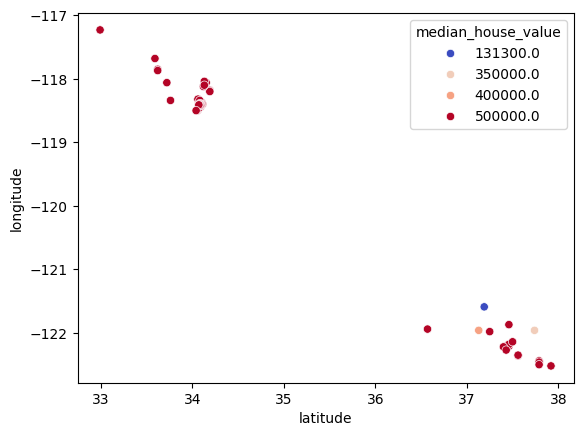

In [87]:
# persons how gain more 14k per year
sb.scatterplot(x='latitude', y='longitude', data=data_filtered[(data_filtered.median_income > 14)], hue='median_house_value', palette='coolwarm')

In [158]:
data_filtered.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,18386.000000,18386.000000,18386.000000,18386.000000,18195.000000,18386.000000,18386.000000,18386.000000,18386.000000
mean,-119.478699,35.589452,26.771239,2677.640814,549.407859,1475.132275,509.986457,3.697830,189278.815240
std,1.979349,2.147711,11.266669,2231.567198,430.854654,1166.655180,390.853109,1.566169,95279.172742
min,-124.300000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.537500,33.920000,17.000000,1459.000000,300.000000,814.000000,284.000000,2.541700,115400.000000
50%,-118.450000,34.240000,27.000000,2147.000000,443.000000,1208.000000,416.000000,3.476300,171100.000000
75%,-117.970000,37.670000,36.000000,3194.750000,660.000000,1785.000000,615.000000,4.625000,243000.000000
max,-114.310000,41.950000,49.000000,39320.000000,6445.000000,35682.000000,6082.000000,13.147700,499100.000000


In [160]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18386 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           18386 non-null  float64
 1   latitude            18386 non-null  float64
 2   housing_median_age  18386 non-null  float64
 3   total_rooms         18386 non-null  float64
 4   total_bedrooms      18195 non-null  float64
 5   population          18386 non-null  float64
 6   households          18386 non-null  float64
 7   median_income       18386 non-null  float64
 8   median_house_value  18386 non-null  float64
 9   ocean_proximity     18386 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.5+ MB


In [161]:
# Remove null or empty values
data_na = data_filtered.dropna()

In [162]:
data_na.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18195 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           18195 non-null  float64
 1   latitude            18195 non-null  float64
 2   housing_median_age  18195 non-null  float64
 3   total_rooms         18195 non-null  float64
 4   total_bedrooms      18195 non-null  float64
 5   population          18195 non-null  float64
 6   households          18195 non-null  float64
 7   median_income       18195 non-null  float64
 8   median_house_value  18195 non-null  float64
 9   ocean_proximity     18195 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.5+ MB


In [163]:
# Convert categorical values to numerical (ocean_proximity)
data_na['ocean_proximity'].value_counts()
# 1 <1H OCEAN
# 2 INLAND
# 3 NEAR OCEAN
# 4 NEAR BAY
# 5 ISLAND

# But the model will think that 5 is more than 4, so we need to convert to binary values,
# so we need to use one hot encoding

ocean_proximity
<1H OCEAN     8165
INLAND        6252
NEAR OCEAN    2276
NEAR BAY      1500
ISLAND           2
Name: count, dtype: int64

In [164]:
# Dummies / One-Hot Encoding
# NEAR BAY INLAND NEAR OCEAN
#     1       0       0
#     0       1       0

dummies = pd.get_dummies(data_na['ocean_proximity'], dtype=int)
dummies.head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
8,0,0,0,1,0
20,0,0,0,1,0
21,0,0,0,1,0


In [165]:
data_na = data_na.join(dummies)
data_na.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,1,0
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,0,0,0,1,0
20,-122.27,37.85,40.0,751.0,184.0,409.0,166.0,1.3578,147500.0,NEAR BAY,0,0,0,1,0
21,-122.27,37.85,42.0,1639.0,367.0,929.0,366.0,1.7135,159800.0,NEAR BAY,0,0,0,1,0


In [166]:
data_na = data_na.drop('ocean_proximity', axis=1)

In [167]:
data_na.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,0,0,0,1,0
20,-122.27,37.85,40.0,751.0,184.0,409.0,166.0,1.3578,147500.0,0,0,0,1,0
21,-122.27,37.85,42.0,1639.0,367.0,929.0,366.0,1.7135,159800.0,0,0,0,1,0


In [168]:
# Correlation between the variables
data_na.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
longitude,1.000000,-0.922540,-0.028554,0.034700,0.063988,0.089858,0.050350,-0.017614,-0.022945,0.287552,-0.089929,0.005713,-0.415739,0.042236
latitude,-0.922540,1.000000,-0.057572,-0.026590,-0.063897,-0.106171,-0.069717,-0.074514,-0.171720,-0.429795,0.383961,-0.010737,0.310374,-0.162727
housing_median_age,-0.028554,-0.057572,1.000000,-0.374497,-0.331323,-0.278671,-0.310592,-0.198700,0.014989,0.113976,-0.222102,0.001157,0.132736,0.037097
total_rooms,0.034700,-0.026590,-0.374497,1.000000,0.935412,0.860276,0.922459,0.223290,0.153280,-0.015975,0.027484,-0.006955,-0.002187,-0.013399
total_bedrooms,0.063988,-0.063897,-0.331323,0.935412,1.000000,0.880266,0.978774,0.021374,0.080035,0.012570,-0.012289,-0.004427,-0.006183,0.004024
population,0.089858,-0.106171,-0.278671,0.860276,0.880266,1.000000,0.910685,0.040766,0.022142,0.069823,-0.036657,-0.008007,-0.036784,-0.021515
households,0.050350,-0.069717,-0.310592,0.922459,0.978774,0.910685,1.000000,0.046059,0.099566,0.038259,-0.046025,-0.006919,0.003185,0.006123
median_income,-0.017614,-0.074514,-0.198700,0.223290,0.021374,0.040766,0.046059,1.000000,0.665109,0.184215,-0.226553,-0.008820,0.064227,-0.004842
median_house_value,-0.022945,-0.171720,0.014989,0.153280,0.080035,0.022142,0.099566,0.665109,1.000000,0.319547,-0.501849,0.019759,0.112488,0.145871
<1H OCEAN,0.287552,-0.429795,0.113976,-0.015975,0.012570,0.069823,0.038259,0.184215,0.319547,1.000000,-0.652800,-0.009460,-0.270446,-0.341158


<Axes: >

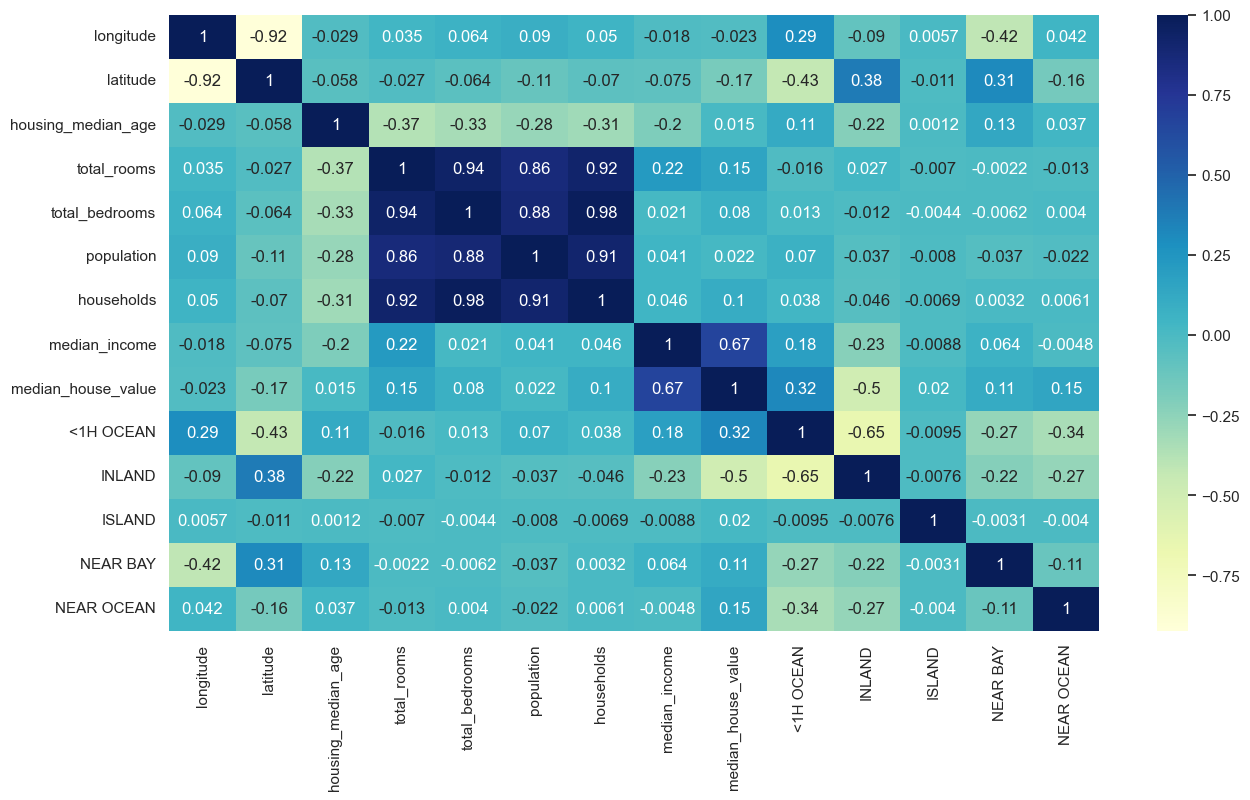

In [169]:
sb.set(rc={'figure.figsize':(15,8)})
sb.heatmap(data_na.corr(), annot=True, cmap='YlGnBu')

In [170]:
# Shows only Correlation between the variables and the median_house_value
# More close to 1, more correlated and more close to -1, less correlated
data_na.corr()['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.665109
<1H OCEAN             0.319547
total_rooms           0.153280
NEAR OCEAN            0.145871
NEAR BAY              0.112488
households            0.099566
total_bedrooms        0.080035
population            0.022142
ISLAND                0.019759
housing_median_age    0.014989
longitude            -0.022945
latitude             -0.171720
INLAND               -0.501849
Name: median_house_value, dtype: float64

<Axes: xlabel='median_house_value', ylabel='median_income'>

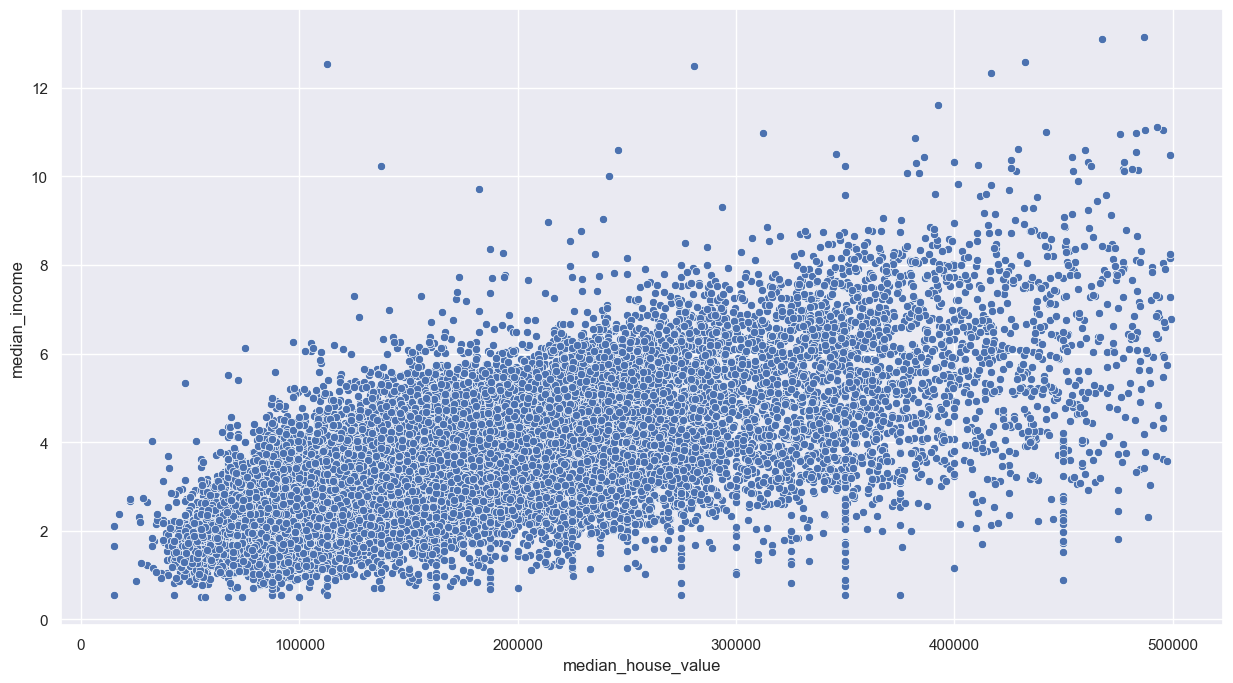

In [171]:
sb.scatterplot(x=data_na['median_house_value'], y=data_na['median_income'])

In [172]:
data_na["bedroom_ratio"] = data_na["total_bedrooms"] / data_na["total_rooms"]

<Axes: >

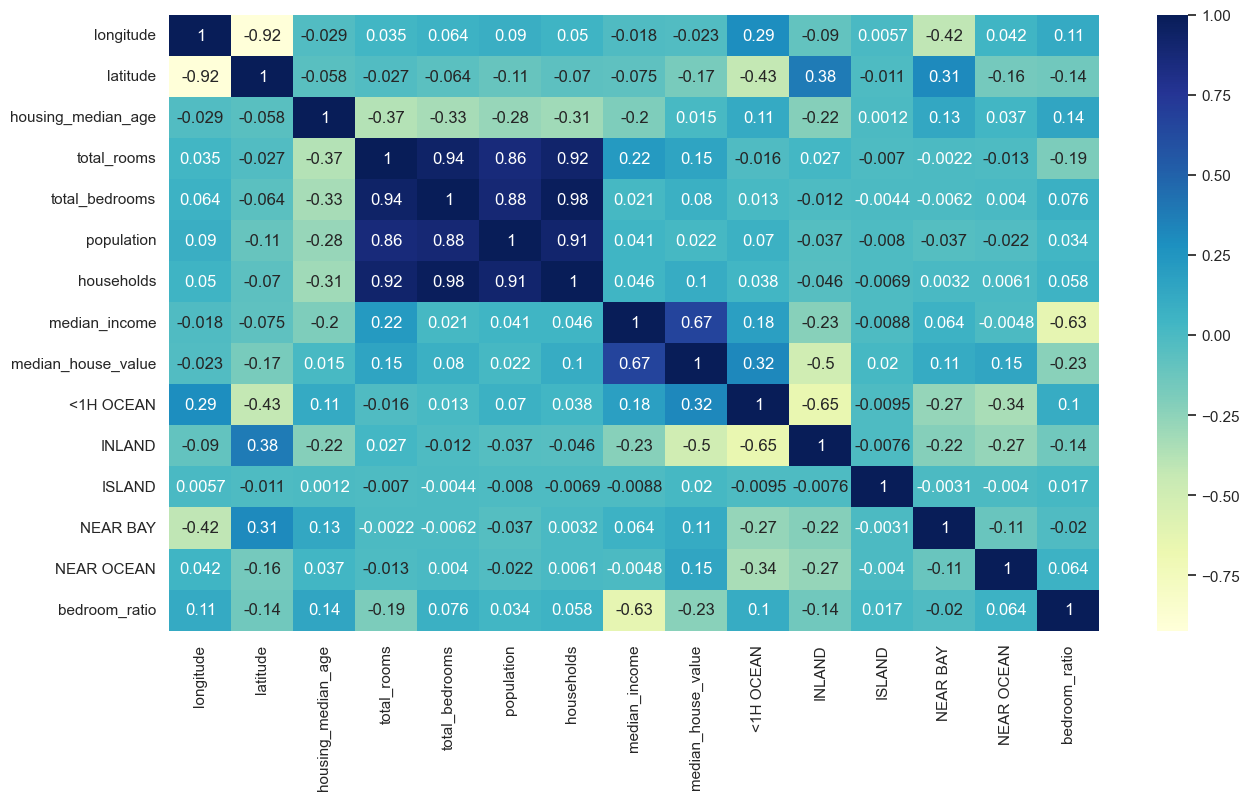

In [173]:
sb.set(rc={'figure.figsize':(15,8)})
sb.heatmap(data_na.corr(), annot=True, cmap='YlGnBu')

In [174]:
# split labels and features
X = data_na.drop('median_house_value', axis=1) # only features and for this reason we drop the median_house_value
y = data_na['median_house_value'] # only labels and for this reason we keep the median_house_value

In [175]:
# Split train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [176]:
# X_train.shape
# X_test.shape
#y_train.shape
# y_test.shape

In [177]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [178]:
type(X_train)

pandas.core.frame.DataFrame

In [179]:
model.fit(X_train, y_train)

LinearRegression()

In [180]:
predictions = model.predict(X_test)

In [181]:
comparative = {"Predictions": predictions, "Real Values": y_test.values, "Difference": y_test.values - predictions}
pd.DataFrame(comparative)

,Predictions,Real Values,Difference
0,246671.608745,337000.0,90328.391255
1,152434.375618,107900.0,-44534.375618
2,96090.663937,137500.0,41409.336063
3,178043.306897,113300.0,-64743.306897
4,169546.908865,156900.0,-12646.908865
...,...,...,...
3634,227665.694555,279100.0,51434.305445
3635,272438.413172,249000.0,-23438.413172
3636,299931.487614,286800.0,-13131.487614
3637,175366.393679,158200.0,-17166.393679


In [182]:
# Overffiting (sobreajuste)
print(model.score(X_test, y_test))
print(model.score(X_train, y_train))

0.6347336370930006
0.6343699968041059


In [183]:
# Error
from sklearn.metrics import mean_squared_error
import numpy as np

# Squaring to remove negative numbers
mse = mean_squared_error(y_test, predictions)

mse

3230227829.008273

In [184]:
# Square root to remove the square
rmse = np.sqrt(mse)
rmse

56835.0932875831

In [185]:
data_na.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio
count,18195.000000,18195.000000,18195.000000,18195.000000,18195.000000,18195.000000,18195.000000,18195.000000,18195.000000,18195.00000,18195.000000,18195.000000,18195.000000,18195.000000,18195.000000
mean,-119.478469,35.589778,26.757021,2678.415499,549.407859,1474.617367,509.890300,3.698224,189245.968508,0.44875,0.343611,0.000110,0.082440,0.125089,0.213818
std,1.979162,2.148169,11.267991,2235.553359,430.854654,1167.572934,390.828534,1.565775,95255.885596,0.49738,0.474926,0.010484,0.275042,0.330829,0.055444
min,-124.300000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.100000
25%,-121.530000,33.920000,17.000000,1461.000000,300.000000,814.000000,284.000000,2.541100,115300.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.176912
50%,-118.450000,34.240000,27.000000,2146.000000,443.000000,1208.000000,416.000000,3.478400,171200.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.203612
75%,-117.970000,37.670000,36.000000,3191.500000,660.000000,1784.000000,615.000000,4.625000,242850.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.240094
max,-114.310000,41.950000,49.000000,39320.000000,6445.000000,35682.000000,6082.000000,13.147700,499100.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
